# Week 4

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from operator import itemgetter
%matplotlib inline

### Common neighbors
We define it as ```common(X,Y) = |N(X) inter N(Y)|```,
where N(X) is the set of neighbors of node X

###### # Example 1

In [6]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'C'), ('B', 'D'), ('A', 'D'), 
        ('D', 'C'), ('A', 'E'), ('C', 'F'), ('E', 'F'), 
        ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')
    ]
)

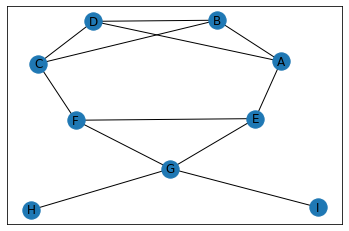

In [49]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [11]:
list(nx.common_neighbors(g, 'H', 'I'))

['G']

In [13]:
list(nx.common_neighbors(g, 'C', 'A'))

['B', 'D']

In [15]:
(
    list(nx.common_neighbors(g, 'G', 'A')),
    list(nx.common_neighbors(g, 'I', 'A'))
)

(['E'], [])

In [16]:
# all common neighbors
comm_neig = [(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)]

comm_neig[:5]

In [22]:
sorted(comm_neig, key=itemgetter(2), reverse=True)[:5]

[('A', 'C', 2), ('G', 'A', 1), ('G', 'C', 1), ('D', 'E', 1), ('D', 'F', 1)]

### Jaccard Coefficient

Number of neighbors normalized by the total number of neighbors

In [30]:
sorted(list(nx.jaccard_coefficient(g)), key=itemgetter(2), reverse=True)[:5]

[('I', 'H', 1.0),
 ('A', 'C', 0.5),
 ('F', 'I', 0.3333333333333333),
 ('F', 'H', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333)]

### Resource Allocation Index

Fraction of a 'resource' that a node can send to another through their common neighbors

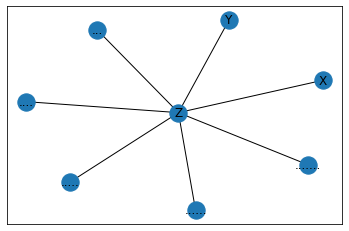

In [50]:
_g = nx.Graph()
_g.add_edges_from([('X', 'Z'), ('Z', 'Y'), 
                   ('Z', '...'), ('Z', '....'),
                   ('Z', '.....'), ('Z', '......'),
                   ('Z', '.......'), ])

nx.draw_networkx(_g, nx.kamada_kawai_layout(_g))

```X``` wants to sends 1 unit of information to ```Y```;

```X``` gives ```1/degree(X)``` to each of its neighbors;

```Z``` receives ```1/degree(X)``` of that information;

```Z``` fowards ```(1/degree(X))/degree(Z)``` to ```Y```